<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.337153,35.448090,27.563931,-23.541928,117.807245,18.146294,99.660951
1,0.0,1.0,50.551596,82.714804,64.632261,-523.074162,-315.175501,121.327059,-436.502560
2,0.0,2.0,93.886364,81.282451,60.916516,-602.015910,-355.930579,-164.472455,-191.458124
3,0.0,3.0,27.939879,87.118178,28.332499,1348.658684,1502.049241,370.123298,1131.925943
4,0.0,4.0,87.249928,94.052507,46.232301,-127.703699,109.831036,-63.552916,173.383952
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.884356,78.769918,43.706300,948.339203,1102.699776,581.257216,521.442560
19996,999.0,16.0,92.857690,86.181427,67.394726,51.175999,307.609842,581.761177,-274.151335
19997,999.0,17.0,72.995425,20.301152,47.180159,-225.088722,-74.611986,-174.888174,100.276188
19998,999.0,18.0,75.027136,99.077341,90.275888,2366.376373,2640.756739,993.690215,1647.066524


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    68.337153  35.448090  27.563931   -23.541928   117.807245   
      1.0    50.551596  82.714804  64.632261  -523.074162  -315.175501   
      2.0    93.886364  81.282451  60.916516  -602.015910  -355.930579   
      3.0    27.939879  87.118178  28.332499  1348.658684  1502.049241   
      4.0    87.249928  94.052507  46.232301  -127.703699   109.831036   
...                ...        ...        ...          ...          ...   
999.0 15.0   21.884356  78.769918  43.706300   948.339203  1102.699776   
      16.0   92.857690  86.181427  67.394726    51.175999   307.609842   
      17.0   72.995425  20.301152  47.180159  -225.088722   -74.611986   
      18.0   75.027136  99.077341  90.275888  2366.376373  2640.756739   
      19.0   80.428038  39.477625  91.931212   229.962570   451.799446   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     18.146294    99.660951  
      1.0    121.327059  -436.502560  
      2.0   -164.472455  -191.458124  
      3.0    370.123298  1131.925943  
      4.0    -63.552916   173.383952  
...                 ...          ...  
999.0 15.0   581.257216   521.442560  
      16.0   581.761177  -274.151335  
      17.0  -174.888174   100.276188  
      18.0   993.690215  1647.066524  
      19.0   397.260272    54.539174  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    68.337153  35.448090  27.563931   -23.541928   117.807245   
      1.0    50.551596  82.714804  64.632261  -523.074162  -315.175501   
      2.0    93.886364  81.282451  60.916516  -602.015910  -355.930579   
      3.0    27.939879  87.118178  28.332499  1348.658684  1502.049241   
      4.0    87.249928  94.052507  46.232301  -127.703699   109.831036   
...                ...        ...        ...          ...          ...   
999.0 15.0   21.884356  78.769918  43.706300   948.339203  1102.699776   
      16.0   92.857690  86.181427  67.394726    51.175999   307.609842   
      17.0   72.995425  20.301152  47.180159  -225.088722   -74.611986   
      18.0   75.027136  99.077341  90.275888  2366.376373  2640.756739   
      19.0   80.428038  39.477625  91.931212   229.962570   451.799446   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     18.146294    99.660951  
      1.0    121.327059  -436.502560  
      2.0   -164.472455  -191.458124  
      3.0    370.123298  1131.925943  
      4.0    -63.552916   173.383952  
...                 ...          ...  
999.0 15.0   581.257216   521.442560  
      16.0   581.761177  -274.151335  
      17.0  -174.888174   100.276188  
      18.0   993.690215  1647.066524  
      19.0   397.260272    54.539174  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.337153,35.448090,27.563931,-23.541928,117.807245,18.146294,99.660951
1,0.0,1.0,50.551596,82.714804,64.632261,-523.074162,-315.175501,121.327059,-436.502560
2,0.0,2.0,93.886364,81.282451,60.916516,-602.015910,-355.930579,-164.472455,-191.458124
3,0.0,3.0,27.939879,87.118178,28.332499,1348.658684,1502.049241,370.123298,1131.925943
4,0.0,4.0,87.249928,94.052507,46.232301,-127.703699,109.831036,-63.552916,173.383952
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.884356,78.769918,43.706300,948.339203,1102.699776,581.257216,521.442560
19996,999.0,16.0,92.857690,86.181427,67.394726,51.175999,307.609842,581.761177,-274.151335
19997,999.0,17.0,72.995425,20.301152,47.180159,-225.088722,-74.611986,-174.888174,100.276188
19998,999.0,18.0,75.027136,99.077341,90.275888,2366.376373,2640.756739,993.690215,1647.066524


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    68.337153  35.448090  27.563931   -23.541928   117.807245   
      1.0    50.551596  82.714804  64.632261  -523.074162  -315.175501   
      2.0    93.886364  81.282451  60.916516  -602.015910  -355.930579   
      3.0    27.939879  87.118178  28.332499  1348.658684  1502.049241   
      4.0    87.249928  94.052507  46.232301  -127.703699   109.831036   
...                ...        ...        ...          ...          ...   
999.0 15.0   21.884356  78.769918  43.706300   948.339203  1102.699776   
      16.0   92.857690  86.181427  67.394726    51.175999   307.609842   
      17.0   72.995425  20.301152  47.180159  -225.088722   -74.611986   
      18.0   75.027136  99.077341  90.275888  2366.376373  2640.756739   
      19.0   80.428038  39.477625  91.931212   229.962570   451.799446   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     18.146294    99.660951  
      1.0    121.327059  -436.502560  
      2.0   -164.472455  -191.458124  
      3.0    370.123298  1131.925943  
      4.0    -63.552916   173.383952  
...                 ...          ...  
999.0 15.0   581.257216   521.442560  
      16.0   581.761177  -274.151335  
      17.0  -174.888174   100.276188  
      18.0   993.690215  1647.066524  
      19.0   397.260272    54.539174  

[20000 rows x 7 columns]

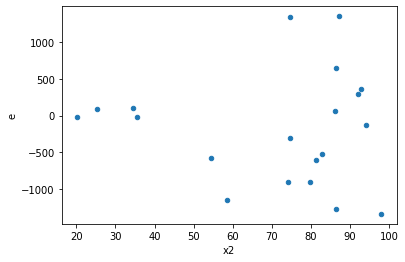

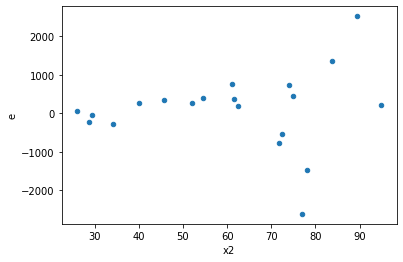

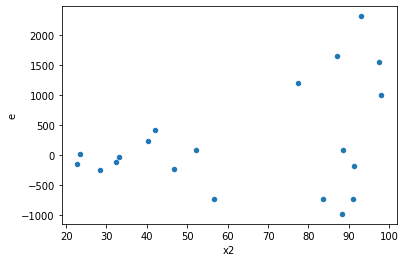

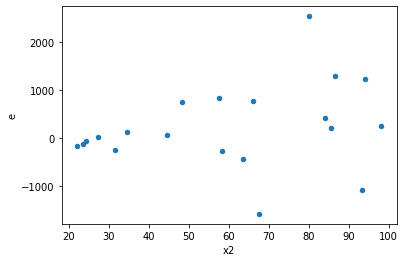

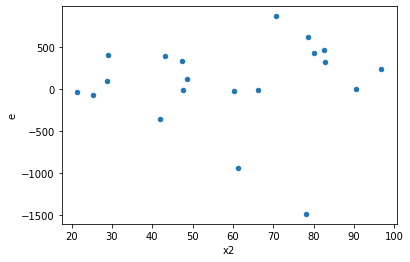

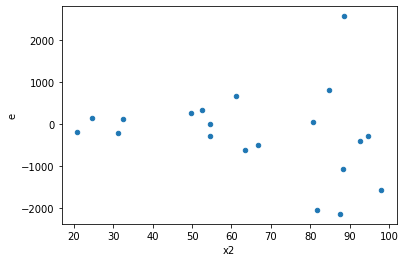

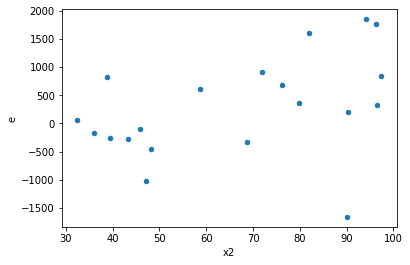

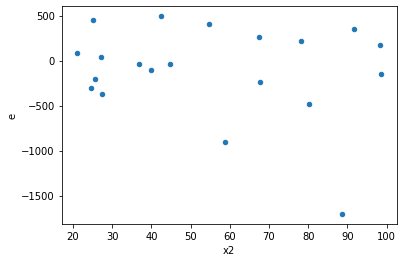

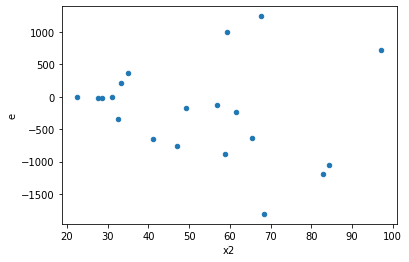

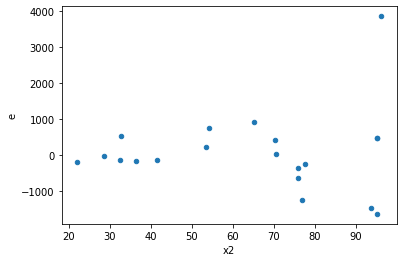

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,8.0,1067415.495143914,11089945.998794105,177902.58252398565,1386243.249849263,7.792147984486753,0.01067089285693168,0.9946645535715342,0.00533544642846584,Reject001=1 : Homoscedasticity
5.0,10.0,4.0,4363298.482565834,3209514.800037198,436329.84825658344,802378.7000092994,1.8389269109489417,0.5846339722189136,0.7076830138905432,0.2923169861094568,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,2811112.0443696384,7446823.019084358,401587.4349099483,1063831.859869194,2.6490665976831345,0.22200674110863883,0.8889966294456806,0.11100337055431941,Reject001=1 : Homoscedasticity
10.0,4.0,10.0,268085.7544154563,9068182.608583346,67021.43860386408,906818.2608583346,13.530271503394028,0.0009631965022713906,0.9995184017488643,0.0004815982511356953,Reject001=0 : Heteroscedasticity
11.0,6.0,8.0,3070574.171020916,4692687.927037256,511762.3618368194,586585.990879657,1.1462077609112955,0.8337748936346587,0.5831125531826706,0.41688744681732937,Reject001=1 : Homoscedasticity
13.0,4.0,10.0,995880.3660398904,3198773.0906818835,248970.0915099726,319877.30906818836,1.284802150845398,0.6783380718713354,0.6608309640643323,0.3391690359356677,Reject001=1 : Homoscedasticity
14.0,8.0,6.0,2305500.4113926585,12175026.429822061,288187.5514240823,2029171.0716370102,7.041147549954315,0.028532184115434678,0.9857339079422827,0.014266092057717339,Reject001=1 : Homoscedasticity
17.0,6.0,8.0,1175691.3200635547,11175815.527196504,195948.55334392577,1396976.940899563,7.129304692786435,0.014132151371251567,0.9929339243143742,0.007066075685625783,Reject001=1 : Homoscedasticity
19.0,7.0,7.0,615702.31146454,3217494.8819613587,87957.47306636286,459642.1259944798,5.225731367335728,0.044406753946840016,0.97779662302658,0.022203376973420008,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,2.0,8041405.368926049,575982.4732556881,670117.1140771707,287991.23662784405,0.4297625453491686,0.27992902871757697,Reject001=1 : Homoscedasticity
1.0,6.0,8.0,1067415.495143914,11089945.998794105,177902.58252398565,1386243.249849263,7.792147984486753,0.01067089285693168,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,2361867.9204489286,783160.6024164904,337409.7029212755,111880.08605949863,0.3315852658973548,0.1685228980296648,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,8655429.384114135,942044.5745541737,1236489.912016305,134577.79636488197,0.10883857203932236,0.009055432915089512,Reject001=0 : Heteroscedasticity
4.0,8.0,6.0,3042725.1943962467,875551.2624044869,380340.64929953084,145925.2104007478,0.38366977253022166,0.21049938740557358,Reject001=1 : Homoscedasticity
5.0,10.0,4.0,4363298.482565834,3209514.800037198,436329.84825658344,802378.7000092994,1.8389269109489417,0.5846339722189136,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,2811112.0443696384,7446823.019084358,401587.4349099483,1063831.859869194,2.6490665976831345,0.22200674110863883,Reject001=1 : Homoscedasticity
7.0,5.0,9.0,2897605.399244749,1500320.1622288427,579521.0798489498,166702.2402476492,0.28765517949942315,0.183536317738445,Reject001=1 : Homoscedasticity
8.0,6.0,8.0,935441.7948136791,1186310.6044399426,155906.96580227985,148288.82555499283,0.9511366268461134,0.9790998187377399,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      749
Reject001=0 : Heteroscedasticity    251
Name: Result_test, dtype: int64